In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [4]:
os.chdir("C:\\Users")
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = df.iloc[: , :-1]
y= df.iloc[: , -1]

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
pca = PCA()
X_train_p = pca.fit_transform(X_train)
X_test_p  = pca.transform(X_test)

In [12]:
pca.explained_variance_ratio_

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

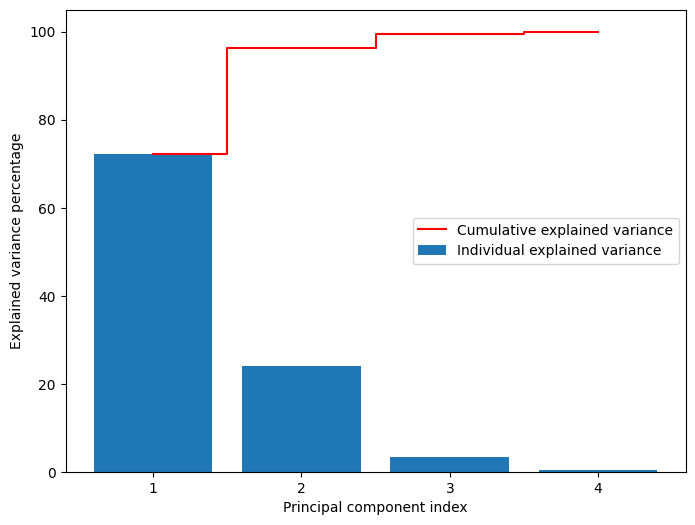

In [14]:
pca = PCA()
X_train_p = pca.fit_transform(X_train)
X_test_p  = pca.transform(X_test)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
plt.figure(figsize=(8,6))
plt.bar(range(1, 5), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 5), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')


In [15]:
pca = PCA(n_components=1)
X_train_p1 = pca.fit_transform(X_train)
X_test_p1  = pca.transform(X_test)

In [17]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_p1, y_train)
y_pred = clf.predict(X_test_p1)

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy:  0.9333333333333333


In [20]:
pca = PCA(n_components=3)
X_train_p3 = pca.fit_transform(X_train)
X_test_p3  = pca.transform(X_test)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_p3, y_train)
y_pred = clf.predict(X_test_p3)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)


[[11  0  0]
 [ 0  8  5]
 [ 0  1  5]]
Accuracy:  0.8


In [21]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",  accuracy)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy:  1.0
